## Transfer Learning resnet 50 using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DM_AP/dataset/train'
valid_path = '/content/drive/MyDrive/DM_AP/dataset/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob("/content/drive/MyDrive/DM_AP/dataset/train/*")

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DM_AP/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1952 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DM_AP/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
61/61 [==============================] - 331s 5s/step - loss: 0.8199 - accuracy: 0.6860 - val_loss: 0.7091 - val_accuracy: 0.6667
Epoch 2/30
61/61 [==============================] - 329s 5s/step - loss: 0.9203 - accuracy: 0.6511 - val_loss: 0.7098 - val_accuracy: 0.6667
Epoch 3/30
61/61 [==============================] - 329s 5s/step - loss: 0.9310 - accuracy: 0.6726 - val_loss: 0.5549 - val_accuracy: 0.7222
Epoch 4/30
61/61 [==============================] - 329s 5s/step - loss: 0.7406 - accuracy: 0.7172 - val_loss: 0.6619 - val_accuracy: 0.7778
Epoch 5/30
61/61 [==============================] - 328s 5s/step - loss: 0.7029 - accuracy: 0.7147 - val_loss: 0.8774 - val_accuracy: 0.7222
Epoch 6/30
61/61 [==============================] - 329s 5s/step - loss: 0.6260 - accuracy: 0.7505 - val_loss: 0.7179 - val_accuracy: 0.7222
Epoch 7/30
61/61 [==============================] - 329s 5s/step - loss: 0.6803 - accuracy: 0.7310 - val_loss: 0.8046 - val_accuracy: 0.7222
Epoch 8/30
61

In [ ]:
import matplotlib.pyplot as plt

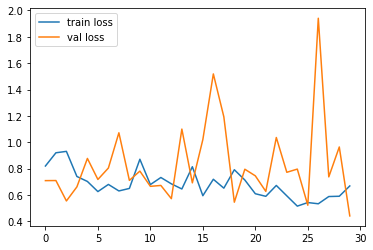

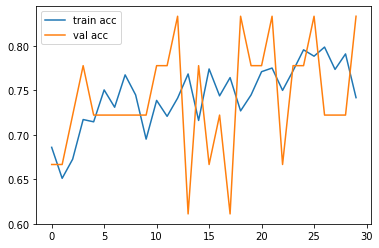

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/DM_AP/model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[4.61769477e-03, 9.80082214e-01, 1.06567604e-05, 1.52894659e-02],
       [6.20685983e-03, 1.27682567e-01, 3.29289562e-03, 8.62817705e-01],
       [1.10966014e-02, 5.07631114e-07, 9.88902509e-01, 3.21966382e-07],
       [9.20386799e-03, 3.12245876e-01, 1.27477972e-02, 6.65802479e-01],
       [4.65421798e-03, 3.82010709e-04, 9.94086146e-01, 8.77617160e-04],
       [9.49451566e-01, 4.78039049e-02, 2.70286080e-04, 2.47423537e-03],
       [4.69087839e-01, 5.10169208e-01, 7.94373639e-03, 1.27992257e-02],
       [1.45905958e-02, 1.09026550e-04, 3.21897765e-04, 9.84978497e-01],
       [3.49696986e-02, 1.71471253e-01, 1.76125988e-02, 7.75946438e-01],
       [5.83979891e-05, 5.45498381e-07, 9.99929309e-01, 1.17766031e-05],
       [6.36173738e-03, 9.77039397e-01, 2.22357642e-03, 1.43753607e-02],
       [9.99975443e-01, 6.55482424e-08, 1.03632856e-05, 1.40995789e-05],
       [9.36108269e-03, 9.89152789e-01, 1.21404692e-05, 1.47391262e-03],
       [1.55128375e-01, 7.69395888e-01, 5.59231713e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 3, 2, 3, 2, 0, 1, 3, 3, 2, 1, 0, 1, 1, 2, 1, 2, 3])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/DM_AP/model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/DM_AP/dataset/test/fresh cotton leaf/d (366).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[155., 206.,  87.],
        [160., 209.,  94.],
        [169., 213., 100.],
        ...,
        [ 76., 172.,  49.],
        [ 91., 184.,  67.],
        [ 91., 184.,  70.]],

       [[159., 209.,  94.],
        [160., 209.,  94.],
        [168., 215., 101.],
        ...,
        [105., 198.,  81.],
        [ 89., 186.,  70.],
        [ 90., 181.,  76.]],

       [[165., 215., 100.],
        [172., 221., 106.],
        [164., 208.,  95.],
        ...,
        [ 79., 176.,  60.],
        [ 75., 172.,  59.],
        [ 71., 162.,  57.]],

       ...,

       [[ 81., 156.,  65.],
        [ 80., 151.,  59.],
        [100., 172.,  73.],
        ...,
        [ 82.,  72.,  37.],
        [ 95.,  85.,  50.],
        [115., 100.,  59.]],

       [[ 74., 144.,  55.],
        [ 71., 141.,  52.],
        [ 83., 152.,  63.],
        ...,
        [ 88.,  78.,  43.],
        [ 92.,  82.,  47.],
        [104.,  88.,  52.]],

       [[ 82., 152.,  63.],
        [ 80., 150.,  64.],
        [ 87., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.02834714, 0.3830767 , 0.5130922 , 0.0754839 ]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

True